In [1]:
import pandas as pd
from sklearn.datasets import load_boston

In [2]:
data=load_boston(return_X_y=False)
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [3]:
data=pd.read_csv(r"boston_data.csv")

In [4]:
data


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [12]:
x=data.drop(columns="MEDV") #independent Features
y=data["MEDV"] # Dependent/Target Variable

## Train test Split

In [32]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=123)

In [33]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(339, 13)
(339,)
(167, 13)
(167,)


## Model Building with Tensorflow

- Model Init- DEfine the network architecture (#inputs,#outputs.#HLs,#Nodes) 
- MOdel compilation- Define the type of problem (Loss Function)
- Model Train-Pass Dataser,#Iteration,TEst Data

In [34]:
import tensorflow as tf

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.optimizers import SGD,Adam

In [36]:
model=Sequential() #Epmty Model
model.add(Input(13)) # INput LAyer
model.add(Dense(5,activation="relu")) #HL1
model.add(Dense(1)) # Output LAyer

In [37]:
# MOdel Compilation
# model.compile(optimizer=SGD(learning_rate=0.00001),loss="mean_squared_error") #stochastic gradient Descent

model.compile(optimizer=Adam(0.003),loss="mean_squared_error") #stochastic gradient Descent


In [38]:
# Train
model.fit(x=x_train,y=y_train,epochs=250,validation_data=(x_test,y_test),batch_size=32)

Epoch 1/250
11/11 [==============================] - 1s 25ms/step - loss: 33623.5547 - val_loss: 22914.4258
Epoch 2/250
11/11 [==============================] - 0s 5ms/step - loss: 17617.5234 - val_loss: 12069.5654
Epoch 3/250
11/11 [==============================] - 0s 4ms/step - loss: 9147.4922 - val_loss: 5959.5234
Epoch 4/250
11/11 [==============================] - 0s 5ms/step - loss: 4413.4697 - val_loss: 2486.6233
Epoch 5/250
11/11 [==============================] - 0s 5ms/step - loss: 1704.1252 - val_loss: 782.4908
Epoch 6/250
11/11 [==============================] - 0s 6ms/step - loss: 558.9689 - val_loss: 413.5416
Epoch 7/250
11/11 [==============================] - 0s 5ms/step - loss: 335.1602 - val_loss: 438.7753
Epoch 8/250
11/11 [==============================] - 0s 5ms/step - loss: 305.5521 - val_loss: 355.7452
Epoch 9/250
11/11 [==============================] - 0s 4ms/step - loss: 248.9487 - val_loss: 279.5432
Epoch 10/250
11/11 [==============================] - 0s 4m

Epoch 81/250
11/11 [==============================] - 0s 4ms/step - loss: 62.0658 - val_loss: 52.1703
Epoch 82/250
11/11 [==============================] - 0s 4ms/step - loss: 60.9349 - val_loss: 51.8667
Epoch 83/250
11/11 [==============================] - 0s 5ms/step - loss: 60.8913 - val_loss: 51.7239
Epoch 84/250
11/11 [==============================] - 0s 5ms/step - loss: 60.6689 - val_loss: 51.5506
Epoch 85/250
11/11 [==============================] - 0s 5ms/step - loss: 60.8948 - val_loss: 51.4324
Epoch 86/250
11/11 [==============================] - 0s 5ms/step - loss: 60.5888 - val_loss: 51.4352
Epoch 87/250
11/11 [==============================] - 0s 4ms/step - loss: 60.6037 - val_loss: 51.3659
Epoch 88/250
11/11 [==============================] - 0s 5ms/step - loss: 60.8200 - val_loss: 51.1052
Epoch 89/250
11/11 [==============================] - 0s 4ms/step - loss: 60.0075 - val_loss: 51.1212
Epoch 90/250
11/11 [==============================] - 0s 4ms/step - loss: 60.3622 

11/11 [==============================] - 0s 5ms/step - loss: 54.8103 - val_loss: 44.6270
Epoch 161/250
11/11 [==============================] - 0s 5ms/step - loss: 54.6112 - val_loss: 44.4933
Epoch 162/250
11/11 [==============================] - 0s 5ms/step - loss: 54.3457 - val_loss: 44.4320
Epoch 163/250
11/11 [==============================] - 0s 4ms/step - loss: 54.2971 - val_loss: 44.7181
Epoch 164/250
11/11 [==============================] - 0s 5ms/step - loss: 53.6954 - val_loss: 44.4835
Epoch 165/250
11/11 [==============================] - 0s 4ms/step - loss: 54.0323 - val_loss: 44.3043
Epoch 166/250
11/11 [==============================] - 0s 4ms/step - loss: 53.6981 - val_loss: 44.2930
Epoch 167/250
11/11 [==============================] - 0s 4ms/step - loss: 53.9086 - val_loss: 44.1451
Epoch 168/250
11/11 [==============================] - 0s 4ms/step - loss: 55.1092 - val_loss: 44.0862
Epoch 169/250
11/11 [==============================] - 0s 5ms/step - loss: 53.8037 - va

11/11 [==============================] - 0s 5ms/step - loss: 49.9559 - val_loss: 40.3404
Epoch 240/250
11/11 [==============================] - 0s 5ms/step - loss: 49.4825 - val_loss: 40.5365
Epoch 241/250
11/11 [==============================] - 0s 4ms/step - loss: 49.3703 - val_loss: 40.2704
Epoch 242/250
11/11 [==============================] - 0s 5ms/step - loss: 49.5954 - val_loss: 40.2669
Epoch 243/250
11/11 [==============================] - 0s 5ms/step - loss: 49.7363 - val_loss: 40.1534
Epoch 244/250
11/11 [==============================] - 0s 5ms/step - loss: 49.1673 - val_loss: 40.0945
Epoch 245/250
11/11 [==============================] - 0s 5ms/step - loss: 49.4237 - val_loss: 40.0401
Epoch 246/250
11/11 [==============================] - 0s 5ms/step - loss: 49.3083 - val_loss: 39.9231
Epoch 247/250
11/11 [==============================] - 0s 5ms/step - loss: 49.0106 - val_loss: 40.0538
Epoch 248/250
11/11 [==============================] - 0s 4ms/step - loss: 48.6496 - va

In [39]:
history=model.history.history

In [40]:
history.keys()

dict_keys(['loss', 'val_loss'])

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\User\AppData\Local\Temp\ipykernel_12956\2217070938.py:7: UserWarning: Legend does not support 'T' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend("Train","Validation")
C:\Users\User\AppData\Local\Temp\ipykernel_12956\2217070938.py:7: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend("Train","Validation")
C:\Users\User\AppData\Local\Temp\ipykernel_12956\2217070938.py:7: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend("Train","Validation")
C:\Users\User\AppData\Local\Temp\ipykernel_12956\221707093

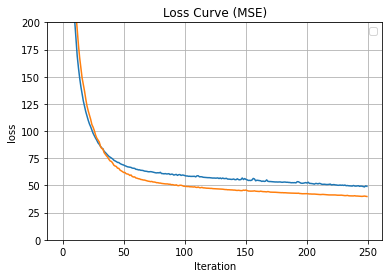

In [42]:
train_loss=history["loss"]
val_loss=history["val_loss"]

plt.plot(train_loss)
plt.plot(val_loss)
plt.ylim(0,200)
plt.legend("Train","Validation")
plt.ylabel("loss")
plt.xlabel("Iteration")
plt.title("Loss Curve (MSE)")
plt.grid()
plt.show()

In [43]:
model.weights

[<tf.Variable 'dense_4/kernel:0' shape=(13, 5) dtype=float32, numpy=
 array([[-0.1076422 , -0.19538507,  0.05040693,  0.07185936, -0.3489045 ],
        [ 0.17641625, -0.02412497, -0.18553679,  0.22177856, -0.37469986],
        [-0.05530841, -0.4044504 ,  0.54581314,  0.44049338, -0.16692403],
        [-0.32567763,  0.841289  , -0.9406552 ,  0.3219539 , -0.13198972],
        [ 0.4782267 ,  0.38717154, -0.01910173,  0.2413412 , -0.32687137],
        [-0.4313871 , -0.09770198, -0.81755817, -0.23233499,  0.2862708 ],
        [ 0.11625116,  0.25987858,  0.60929567, -0.24580038, -0.36781994],
        [-0.29880464, -0.07791305,  0.1414012 ,  0.42876065,  0.30528134],
        [-0.06625547, -0.29241154,  0.45635563,  0.43034035,  0.00989282],
        [-0.20126179,  0.1407584 ,  0.33756247, -0.18674433, -0.5726967 ],
        [-0.33057955,  0.34794196,  0.4932724 , -0.24552207,  0.40004814],
        [ 0.14871718,  0.05834627, -0.02026282,  0.06061609,  0.06475735],
        [ 0.0406166 , -0.902236

In [44]:
y_pred = model.predict(x_test).flatten()

6/6 [==============================] - 0s 1ms/step


In [45]:
pd.DataFrame({"actual":y_test,"preds":y_pred})

,actual,preds
410,15.0,7.160636
85,26.6,26.919146
280,45.4,34.418095
422,20.8,20.158995
199,34.9,29.828112
...,...,...
202,42.3,28.613836
412,17.9,-3.040795
456,12.7,7.015777
204,50.0,40.070332


In [46]:
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error,r2_score

In [47]:
r2_score(y_test,y_pred)

0.5371907180699698

In [48]:
mean_absolute_percentage_error(y_test,y_pred)

0.25500565469045156

In [49]:
mean_squared_error(y_test,y_pred)

39.82885966920212

In [50]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 5)                 70        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 76
Trainable params: 76
Non-trainable params: 0
_________________________________________________________________
None


In [51]:
data.isnull().sum()


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB
